# Wassersein distance maps
19th February 2024

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib.patches import Patch

In [18]:
# pass the wassertein distance to softmax function

wass = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/weights/norm_wass_arr.npy')

In [19]:
wass.shape # rcm x month x lon x lat x 1

(5, 12, 90, 40, 1)

## Best RCM 

In [20]:
# for each lat, lon and month choose the rcm with the smallest wass distance
# plot with xarray for lat and lon

wass_min = np.min(wass, axis=0) # month x lon x lat x 1 

# also locate the index of the minimum wass distance
wass_min_idx = np.argmin(wass, axis=0) # month x lon x lat x 1

In [21]:
wass_min_idx.squeeze().shape

(12, 90, 40)

In [22]:
# convert the np.array to xarray
wass_min_xr = xr.DataArray(wass_min_idx.squeeze(), dims=['month', 'lon', 'lat'], coords=[np.arange(1,13), np.arange(60, 105, 0.5), np.arange(20, 40, 0.5)])

In [26]:
model_names = ['CSIRO-RegCM4', 'MIROC-RCA4', 'MPI_RegCM4', 'MPI-REMO2009', 'NOAA_RCA4']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

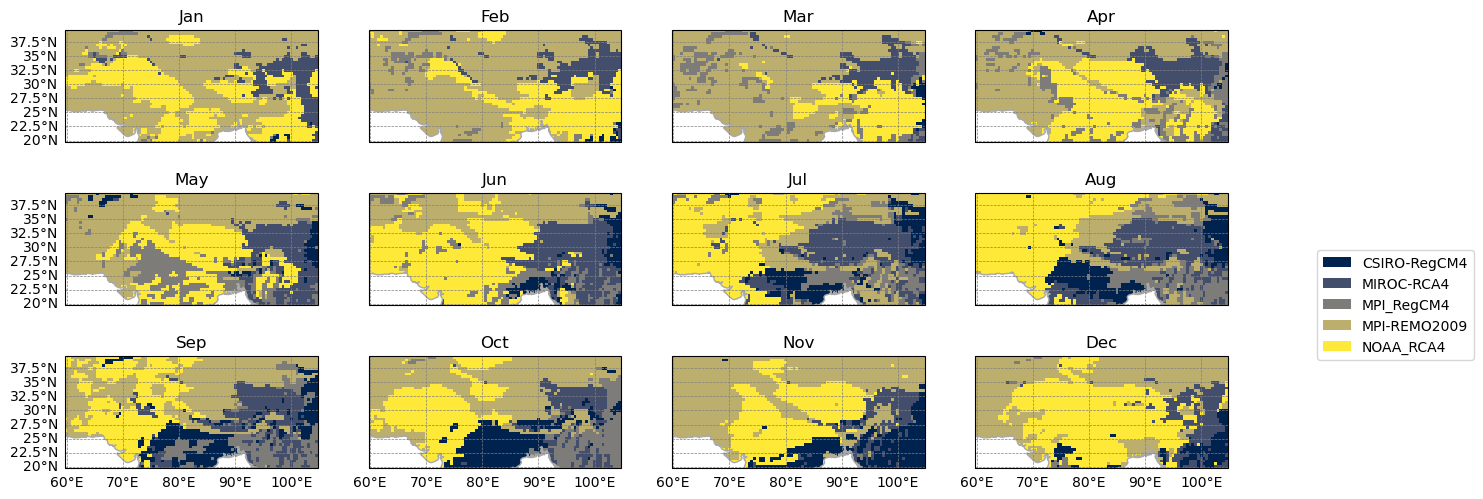

In [42]:
# For each month, plot make a plot where the color of each lat lon is the rcm with the smallest wass distance

fig, ax = plt.subplots(3, 4, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ocean_50m = cf.NaturalEarthFeature(
        "physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

colorlist = plt.get_cmap('cividis', 5)

for i in range(12):
    wass_min_xr.sel(month=i+1).plot(x='lon', y='lat', ax=ax[i//4, i%4], cmap=colorlist, add_colorbar=False)
    ax[i//4, i%4].set_title(months[i])
    gl = ax[i//4, i%4].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    if i % 4 != 0:
       gl.left_labels = False
    if i // 4 != 2:
        gl.bottom_labels = False
    ax[i//4, i%4].add_feature(ocean_50m)

labels = model_names
handles = [Patch(facecolor=colorlist(i)) for i in range(5)]
plt.legend(handles, labels, bbox_to_anchor=(2, 2))

plt.savefig('best_rcm.pdf', bbox_inches='tight')

### Agreement of models

In [12]:
wass_var = np.var(wass, axis=0) # month x lon x lat x 1

In [13]:
wass_var_xr = xr.DataArray(wass_var.squeeze(), dims=['month', 'lon', 'lat'], coords=[np.arange(1,13), np.arange(60, 105, 0.5), np.arange(20, 40, 0.5)])

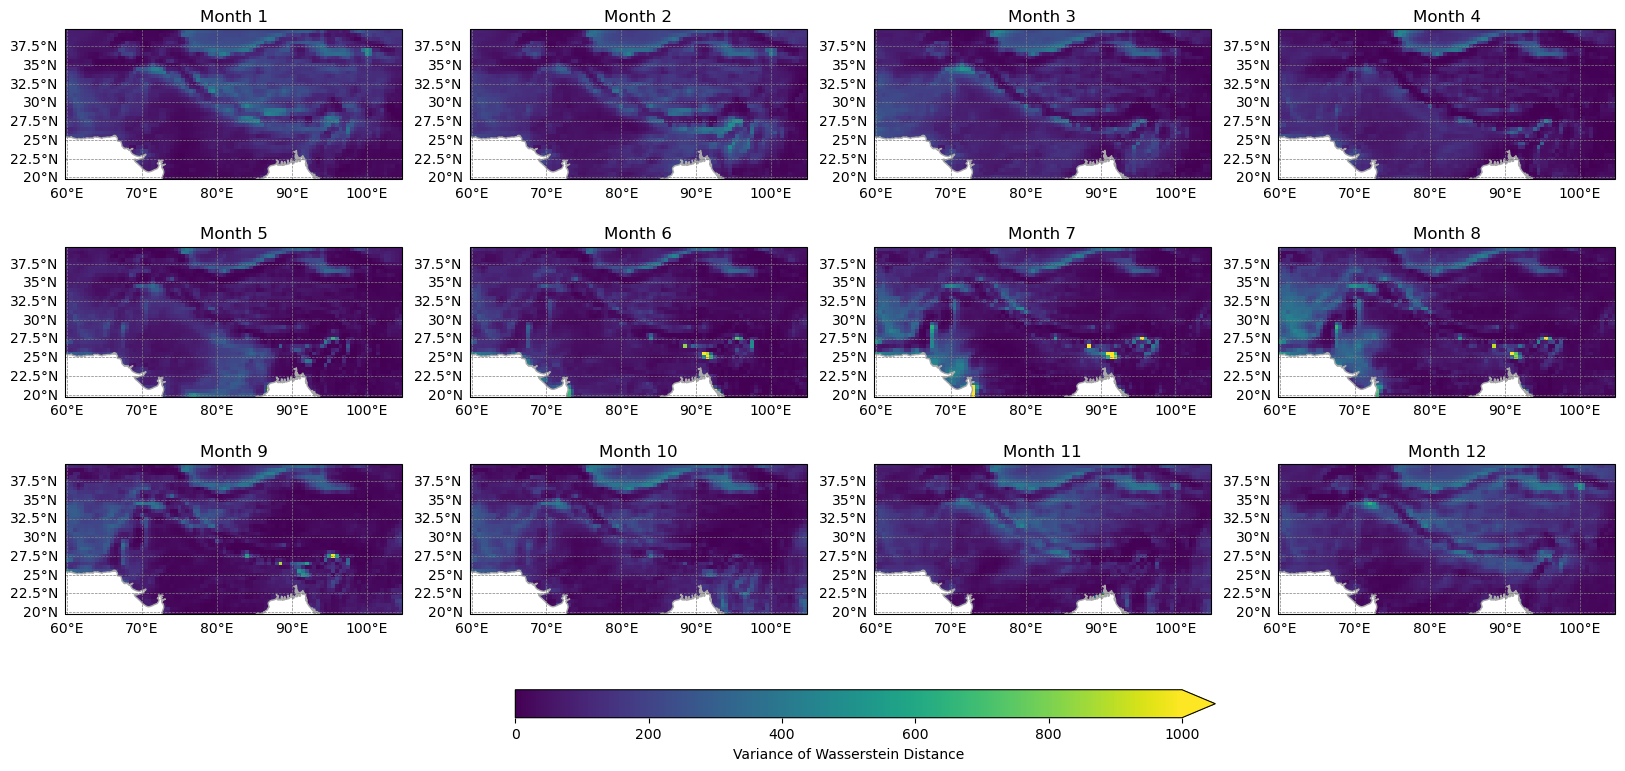

In [25]:
# For each month, plot make a plot where the color of each lat lon is the rcm with the smallest wass distance

fig, ax = plt.subplots(3, 4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ocean_50m = cf.NaturalEarthFeature(
        "physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

for i in range(12):
    g = wass_var_xr.sel(month=i+1).plot(x='lon', y='lat', ax=ax[i//4, i%4], add_colorbar=False, vmin=0, vmax=1000, extend='max')
    ax[i//4, i%4].set_title(f'Month {i+1}')
    gl = ax[i//4, i%4].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    ax[i//4, i%4].add_feature(ocean_50m)

cax = fig.add_axes([0.35, 0, 0.35, 0.035])
fig.colorbar(g, cax=cax, orientation='horizontal', label='Variance of Wasserstein Distance', extend='max')

plt.savefig('rcm_agreement.pdf', bbox_inches='tight')

In [ ]:
# MAke gif

In [3]:
import imageio as io
import os
import glob

In [ ]:
# For each month, plot make a plot where the color of each lat lon is the rcm with the smallest wass distance

fig, ax = plt.subplots(3, 4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ocean_50m = cf.NaturalEarthFeature(
        "physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

colorlist = plt.get_cmap('cividis', 5)

for i in range(12):
    wass_min_xr.sel(month=i+1).plot(x='lon', y='lat', ax=ax[i//4, i%4], cmap=colorlist, add_colorbar=False)
    ax[i//4, i%4].set_title(f'Month {i+1}')
    gl = ax[i//4, i%4].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    ax[i//4, i%4].add_feature(ocean_50m)

labels = [f'RCM {i+1}' for i in range(5)]
handles = [Patch(facecolor=colorlist(i)) for i in range(5)]
plt.legend(handles, labels, loc='lower right')

plt.savefig('best_rcm.pdf', bbox_inches='tight')